In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dataset = pd.read_csv("C:/Users/Alex/Desktop/py/input/data_gdpr_afterclean.csv")
dataset.shape

(359, 11)

In [3]:
dataset.describe()

,Fine,Country_code,Fines_applied,GDP_pc_2019,GDP_2019
count,3.590000e+02,359.000000,359.000000,359.000000,3.590000e+02
mean,1.563669e+06,14.275766,1.601671,23744.066852,1.399158e+06
std,1.297314e+07,7.911469,0.930608,11737.332820,1.529538e+06
min,0.000000e+00,1.000000,1.000000,6800.000000,1.825400e+04
25%,2.750000e+03,8.000000,1.000000,13180.000000,3.004940e+05
50%,1.295000e+04,13.000000,1.000000,25170.000000,6.808390e+05
75%,6.000000e+04,23.000000,2.000000,33270.000000,1.780046e+06
max,2.046000e+08,25.000000,5.000000,69890.000000,4.951894e+06


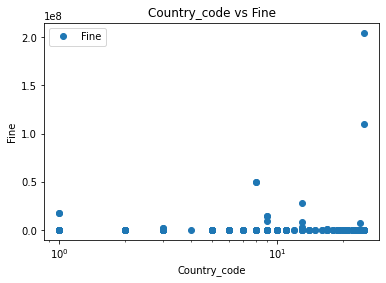

In [4]:
dataset.plot(x='Country_code', y='Fine', style='o')  
plt.title('Country_code vs Fine')
plt.xscale("log")
plt.xlabel('Country_code')  
plt.ylabel('Fine')  
plt.show()

In [5]:
dataset = dataset[(dataset[['Fine']] != 0).all(axis=1)]
dataset["Fine"].sort_values(ascending=False)


39     204600000
38     110390200
82      50000000
180     50000000
308     27802946
         ...    
54           194
153          194
107          118
289          118
261           90
Name: Fine, Length: 354, dtype: int64

In [6]:
dataset['Fine'] = np.log(dataset['Fine'])

<ipython-input-6-2f45d0cc1584>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Fine'] = np.log(dataset['Fine'])


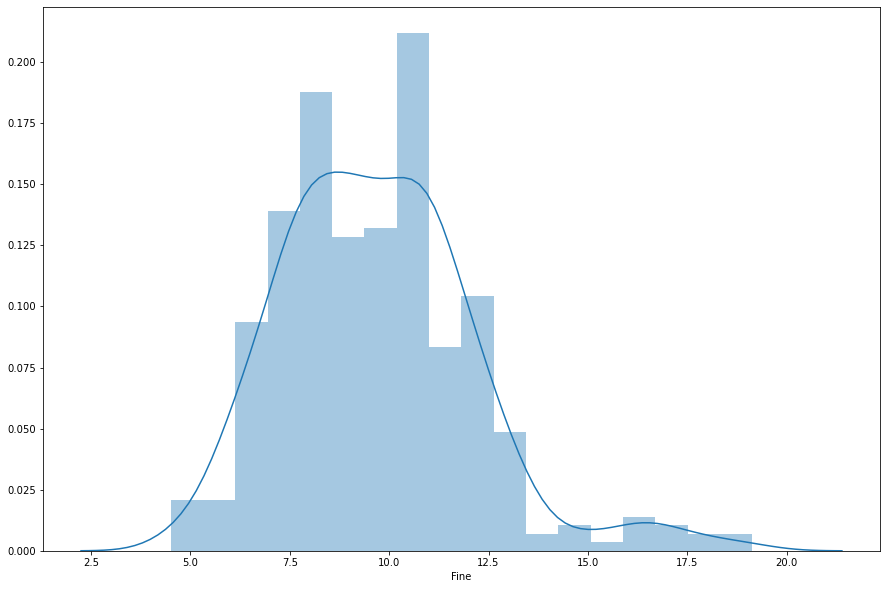

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Fine'])

In [8]:
X = dataset['Country_code'].values.reshape(-1,1)
y = dataset['Fine'].values.reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [11]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[9.00633481]
[[0.0526251]]


In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,10.308953,10.216712
1,9.625756,9.585211
2,10.691945,10.216712
3,8.006368,10.216712
4,5.961005,9.322085
...,...,...
66,10.778956,10.216712
67,7.600902,10.058837
68,10.596635,10.216712
69,11.289782,9.479961


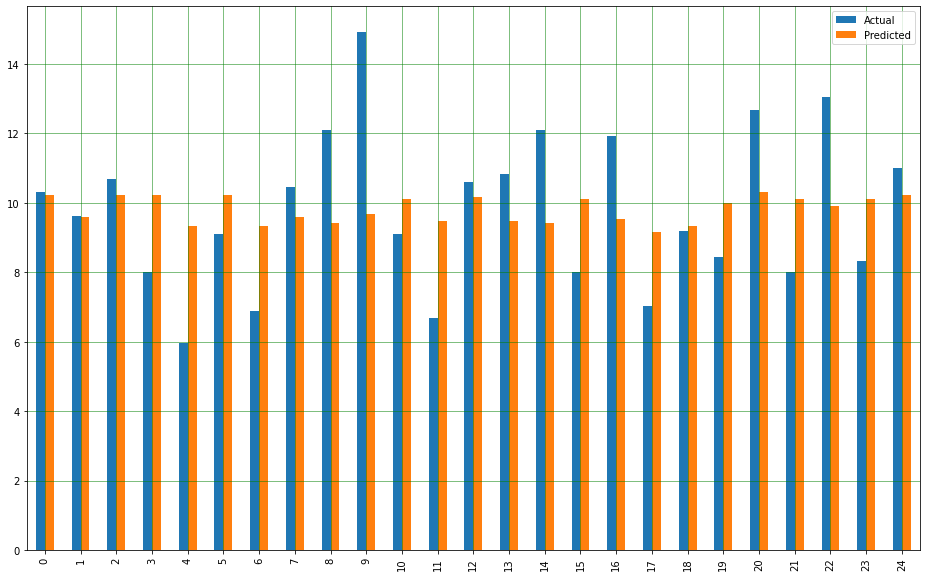

In [14]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

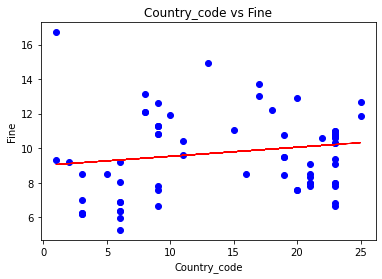

In [15]:
plt.scatter(X_test, y_test,  color='blue')
plt.title('Country_code vs Fine')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.xlabel('Country_code')  
plt.ylabel('Fine')  
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9174730134401352
Mean Squared Error: 5.432852563228097
Root Mean Squared Error: 2.3308480352069494


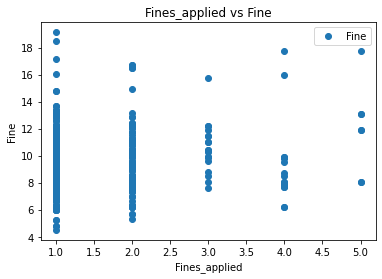

In [17]:
dataset.plot(x='Fines_applied', y='Fine', style='o')  
plt.title('Fines_applied vs Fine')
plt.xlabel('Fines_applied')  
plt.ylabel('Fine')  
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb77988>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb77ce8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb777d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb85070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb851f0>],
 'means': []}

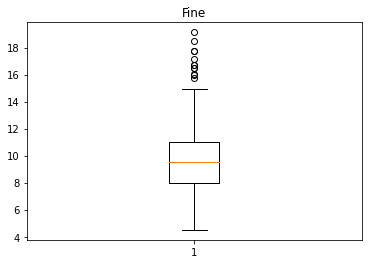

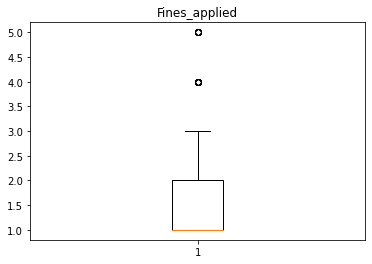

In [18]:
fig1, ax2 = plt.subplots()
fig1, ax1 = plt.subplots()
ax1.set_title('Fines_applied')
ax2.set_title('Fine')
ax1.boxplot(dataset["Fines_applied"])
ax2.boxplot(dataset["Fine"])

In [19]:
dataset['Fine'] = np.log(dataset['Fine'])

<ipython-input-19-2f45d0cc1584>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Fine'] = np.log(dataset['Fine'])


In [20]:
X = dataset['Country_code'].values.reshape(-1,1)
y = dataset['Fine'].values.reshape(-1,1)

In [21]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

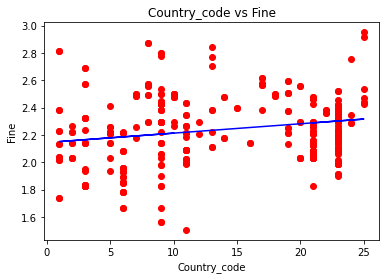

In [23]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Country_code vs Fine')
    plt.xlabel('Country_code')
    plt.ylabel('Fine')
    plt.show()
    return
viz_linear()

In [24]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

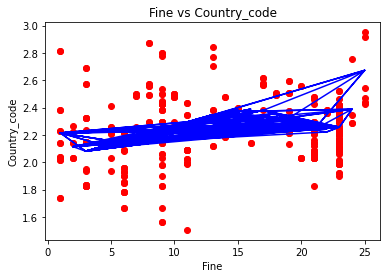

In [25]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Fine vs Country_code')
    plt.xlabel('Fine')
    plt.ylabel('Country_code')
    plt.show()
    return
viz_polymonial()

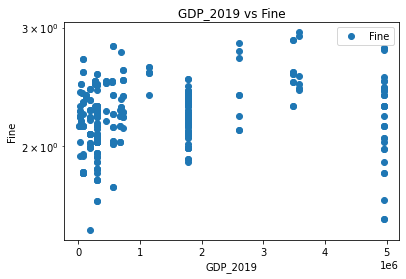

In [26]:
dataset.plot(x='GDP_2019', y='Fine', style='o')
plt.title('GDP_2019 vs Fine')
plt.yscale("log")
plt.xlabel('GDP_2019')
plt.ylabel('Fine')
plt.show()

In [27]:
dataset['Fine'] = np.log(dataset['Fine'])

In [28]:
X = dataset['GDP_2019'].values.reshape(-1,1)
y = dataset['Fine'].values.reshape(-1,1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.847160,0.809001
1,0.817329,0.789941
2,0.862675,0.809001
3,0.732482,0.809001
4,0.579552,0.791261
...,...,...
66,0.866090,0.809001
67,0.707182,0.791192
68,0.858889,0.809001
69,0.885377,0.847215


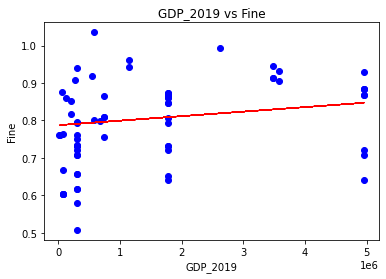

In [33]:
plt.scatter(X_test, y_test,  color='blue')
plt.title('GDP_2019 vs Fine')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.xlabel('GDP_2019')
plt.ylabel('Fine')
plt.show()